In [1]:
# Import libraries
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import pandas as pd        
import numpy as np              

# Reads in csv file into a data frame
custom_df = pd.read_csv("/Users/natelevy/PycharmProjects/PythonB Final Project/custom_df.csv")

# Extract subsets of the data frame based on race
condition = custom_df['Race'] == "White"
white_df = custom_df[condition]

condition = custom_df['Race'] == "Asian"
asian_df = custom_df[condition]

condition = custom_df['Race'] == "American Indian"
indian_df = custom_df[condition]

condition = custom_df['Race'] == "Black"
black_df = custom_df[condition]

# Substitute the value 2 with 0 for the 'Health Insurance Status' column for each race-specific DataFrame
condition_w = white_df['Health Insurance Status'] == 2
condition_a = asian_df['Health Insurance Status'] == 2
condition_i = indian_df['Health Insurance Status'] == 2
condition_b = black_df['Health Insurance Status'] == 2
condition = custom_df['Health Insurance Status'] == 2

white_df.loc[condition_w, 'Health Insurance Status'] = white_df.loc[condition_w, 'Health Insurance Status'] - 2
asian_df.loc[condition_a, 'Health Insurance Status'] = asian_df.loc[condition_a, 'Health Insurance Status'] - 2
indian_df.loc[condition_i, 'Health Insurance Status'] = indian_df.loc[condition_i, 'Health Insurance Status'] - 2
black_df.loc[condition_b, 'Health Insurance Status'] = black_df.loc[condition_b, 'Health Insurance Status'] - 2
custom_df.loc[condition, 'Health Insurance Status'] = custom_df.loc[condition, 'Health Insurance Status'] - 2


46


Text(0.5, 1.0, 'Effect of Age on Health Insurance Coverage')

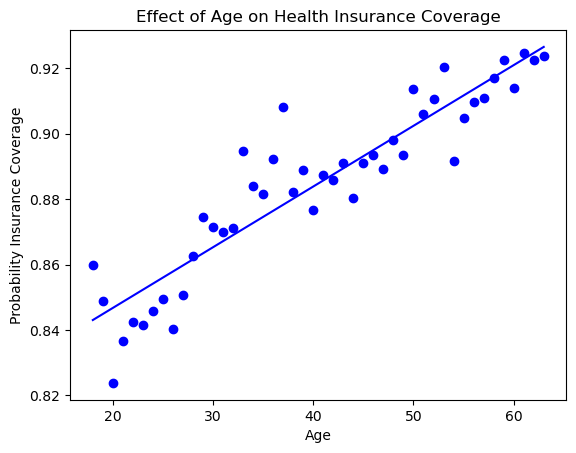

In [8]:
# Preprocess data to only include ages 18-64
custom_df = custom_df[custom_df['Age'] < 65]
custom_df = custom_df[custom_df['Age'] > 18]

# Create a list that groups insurance status by age
mean_values = custom_df.groupby('Age')['Health Insurance Status'].mean()
fig, ax = plt.subplots()

# Perform linear regression
slope, intercept = np.polyfit(range(18,64), mean_values, deg=1)
pred = slope * np.array(range(18,64)) + intercept

ages_all = list(set(custom_df["Age"]))
print(len(mean_values))

# Graph plot
plt.scatter(range(18,64), mean_values, c="blue")
plt.plot(range(18,64), pred, c="blue")
plt.xlabel("Age")
plt.ylabel("Probability Insurance Coverage")
plt.title("Effect of Age on Health Insurance Coverage")

In [6]:
# Proprocess all race-based dataframes to only inlcude ages 18-64
white_df = white_df[white_df['Age'] < 65]
white_df = white_df[white_df['Age'] > 18]
asian_df = asian_df[asian_df['Age'] < 65]
asian_df = asian_df[asian_df['Age'] > 18]
indian_df = indian_df[indian_df['Age'] < 65]
indian_df = indian_df[indian_df['Age'] > 18]
black_df = black_df[black_df['Age'] < 65]
black_df = black_df[black_df['Age'] > 18]

65734
6414
1376
10709


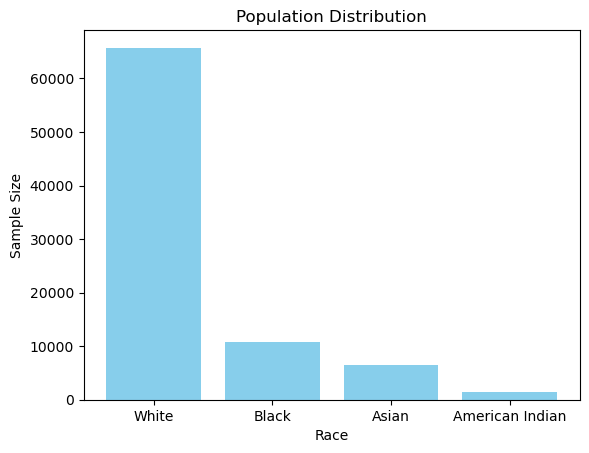

In [9]:
# Population bar graph
white_pop = white_df['Race'].count()
print(white_pop)
asian_pop = asian_df['Race'].count()
print(asian_pop)
indian_pop = indian_df['Race'].count()
print(indian_pop)
black_pop = black_df['Race'].count()
print(black_pop)

plt.bar(["White", "Black", "Asian", "American Indian"],
         [white_pop, black_pop, asian_pop, indian_pop], color="skyblue")

plt.xlabel("Race")
plt.ylabel("Sample Size")
plt.title("Population Distribution")
plt.savefig("Population_Distribution.png")

52006.88572124015
61140.540692235736
30679.660610465115
37755.308338780465


Text(0.5, 1.0, 'Income Distribution')

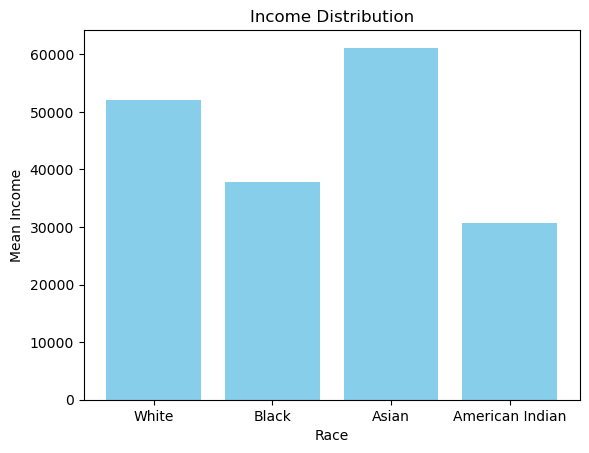

In [12]:
# Income bar graph
white_inc = white_df['Income'].mean()
print(white_inc)
asian_inc = asian_df['Income'].mean()
print(asian_inc)
indian_inc = indian_df['Income'].mean()
print(indian_inc)
black_inc = black_df['Income'].mean()
print(black_inc)

plt.bar(["White", "Black", "Asian", "American Indian"],
         [white_inc, black_inc, asian_inc, indian_inc], color="skyblue")

plt.xlabel("Race")
plt.ylabel("Mean Income")
plt.title("Income Distribution")

In [ ]:
# mean health insurance for each age group
mean_values_w = white_df.groupby('Age')['Health Insurance Status'].mean()
mean_values_a = asian_df.groupby('Age')['Health Insurance Status'].mean()
mean_values_i = indian_df.groupby('Age')['Health Insurance Status'].mean()
mean_values_b = black_df.groupby('Age')['Health Insurance Status'].mean()

In [ ]:
# Define the columns I care about for each race data frame: Insurance status, age
insurance_status_w = np.array(white_df["Health Insurance Status"].tolist())
age_w = np.array(white_df["Age"].tolist())

insurance_status_a = np.array(asian_df["Health Insurance Status"].tolist())
age_a = np.array(asian_df["Age"].tolist())

insurance_status_i = np.array(indian_df["Health Insurance Status"].tolist())
age_i = np.array(indian_df["Age"].tolist())

insurance_status_b = np.array(black_df["Health Insurance Status"].tolist())
age_b = np.array(black_df["Age"].tolist())

In [ ]:
# Perform linear regression, Insurance Status ~ Age
slope_w, intercept_w = np.polyfit(age_w, insurance_status_w, deg=1)
y_pred_w = intercept_w + slope_w * age_w

slope_a, intercept_a = np.polyfit(age_a, insurance_status_a, deg=1)
y_pred_a = intercept_a + slope_a * age_a

slope_i, intercept_i = np.polyfit(age_i, insurance_status_i, deg=1)
y_pred_i = intercept_i + slope_i * age_i

slope_b, intercept_b = np.polyfit(age_b, insurance_status_b, deg=1)
y_pred_b = intercept_b + slope_b * age_b


In [ ]:
# Create figure with all incomes and races
plt.figure()
plt.plot(age_a, y_pred_a, label="Asian", c="blue")
plt.plot(age_w, y_pred_w, label="White", c="red")
plt.plot(age_b, y_pred_b, label = "Black", c="orange")
plt.plot(age_i, y_pred_i, label="American Indian", c="green")

ages = [x for x in range(18,64)]
plt.scatter(ages,mean_values_w, alpha=0.3, s=10, c="red")
plt.scatter(ages,mean_values_a, alpha=0.3, s=10, c="blue")
plt.scatter(ages,mean_values_i, alpha=0.3, s=10, c="green")
plt.scatter(ages,mean_values_b, alpha=0.3, s=10, c="orange")

plt.xlabel('Age')
plt.ylabel('Probability of Insurance Coverage')
plt.title('Age vs. Probability of Health Insurance Coverage')
plt.legend(loc="lower right", fancybox=True, framealpha=1, shadow=True,borderpad=1, fontsize='small')
plt.ylim(0.5,1)
plt.show()
plt.savefig('plot w regressions and scatter.png')

In [ ]:
# Income modifier: Process data to only include individuals that make a certain amount of money
white_df = white_df[white_df['Income'] > 100000]
white_df = white_df[white_df['Income'] >= 75001]
asian_df = asian_df[asian_df['Income'] > 100000]
asian_df = asian_df[asian_df['Income'] >= 75001]
indian_df = indian_df[indian_df['Income'] > 100000]
indian_df = indian_df[indian_df['Income'] >= 75001]
black_df = black_df[black_df['Income'] > 100000]
black_df = black_df[black_df['Income'] >= 75001]

In [ ]:
insurance_status_w = np.array(white_df["Health Insurance Status"].tolist())
age_w = np.array(white_df["Age"].tolist())

insurance_status_a = np.array(asian_df["Health Insurance Status"].tolist())
age_a = np.array(asian_df["Age"].tolist())

insurance_status_i = np.array(indian_df["Health Insurance Status"].tolist())
age_i = np.array(indian_df["Age"].tolist())

insurance_status_b = np.array(black_df["Health Insurance Status"].tolist())
age_b = np.array(black_df["Age"].tolist())

In [ ]:
# Perform linear regression
slope_w, intercept_w = np.polyfit(age_w, insurance_status_w, deg=1)
y_pred_w = intercept_w + slope_w * age_w

slope_a, intercept_a = np.polyfit(age_a, insurance_status_a, deg=1)
y_pred_a = intercept_a + slope_a * age_a

slope_i, intercept_i = np.polyfit(age_i, insurance_status_i, deg=1)
y_pred_i = intercept_i + slope_i * age_i

slope_b, intercept_b = np.polyfit(age_b, insurance_status_b, deg=1)
y_pred_b = intercept_b + slope_b * age_b

In [ ]:
mean_values_w = white_df.groupby('Age')['Health Insurance Status'].mean()
mean_values_a = asian_df.groupby('Age')['Health Insurance Status'].mean()
mean_values_i = indian_df.groupby('Age')['Health Insurance Status'].mean()
mean_values_b = black_df.groupby('Age')['Health Insurance Status'].mean()

In [ ]:
fig, axs = plt.subplots()


axs.plot(age_a, y_pred_a, label="Asian", c="blue")
axs.plot(age_w, y_pred_w, label="White", c="red")
axs.plot(age_b, y_pred_b, label = "Black", c="orange")
axs.plot(age_i, y_pred_i, label="American Indian", c="green")

ages = [x for x in range(18,64)]

# Graph income-based linear regressions for each race
axs.scatter(ages,mean_values_w, alpha=0.3, s=10, c="red")
axs.scatter(ages[:43],mean_values_a, alpha=0.3, s=10, c="blue")
axs.scatter(ages[:30],mean_values_i, alpha=0.3, s=10, c="green")
axs.scatter(ages[:42],mean_values_b, alpha=0.3, s=10, c="orange")
axs.legend(loc="lower right", fancybox=True, framealpha=1, shadow=True,borderpad=1, fontsize='small')
axs.set_xlabel('Age')
axs.set_ylabel('Probability of Insurance Coverage')
axs.set_title('>$100,000')
axs.set_ylim(0.5,1.01)